<a href="https://colab.research.google.com/github/amengdv/MultimediaMath/blob/main/WIG3001_Group_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group C - Colour Space Transformation Using Matrix Multiplication**

**RGB to HSV**

Saving colorful-790254_1280.jpg to colorful-790254_1280 (3).jpg


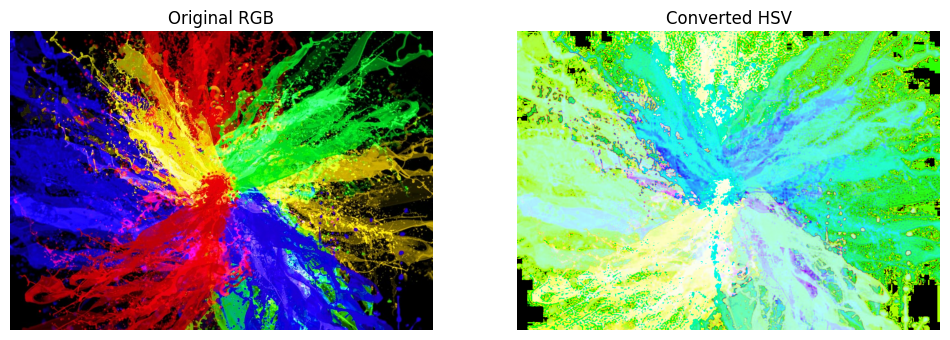

In [ ]:
# Libraries Required
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Upload and Load Image
uploaded = files.upload()
fileName = list(uploaded.keys())[0]
img = Image.open(fileName).convert('RGB')
rgbArray = np.asarray(img) / 255.0

# Extract R, G, B matrices
R = rgbArray[:, :, 0]
G = rgbArray[:, :, 1]
B = rgbArray[:, :, 2]

# Compute Cmax, Cmin and Delta
Cmax = np.max(rgbArray, axis=2)
Cmin = np.min(rgbArray, axis=2)
Delta = Cmax - Cmin

# Initialize HSV matrices
H = np.zeros_like(Cmax)
S = np.zeros_like(Cmax)
V = Cmax.copy()

# Compute Hue (H)
mask = Delta != 0

# Case 1: R is max
r_mask = (Cmax == R) & mask
H[r_mask] = 60 * np.mod(((G - B)[r_mask] / Delta[r_mask]), 6)

# Case 2: G is max
g_mask = (Cmax == G) & mask
H[g_mask] = 60 * (((B - R)[g_mask] / Delta[g_mask]) + 2)

# Case 3: B is max
b_mask = (Cmax == B) & mask
H[b_mask] = 60 * (((R - G)[b_mask] / Delta[b_mask]) + 4)

# Compute Saturation (S)
S[Cmax != 0] = (Delta[Cmax != 0] / Cmax[Cmax != 0])

# Stack HSV back together
HSV = np.stack([H / 360, S, V], axis=2)

# Display Images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original RGB")
plt.imshow(rgbArray)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Converted HSV")
plt.imshow(HSV)
plt.axis('off')

plt.show()

**HSV to RGB**

**RGB to YCbCr**

**YCbCr to RGB**

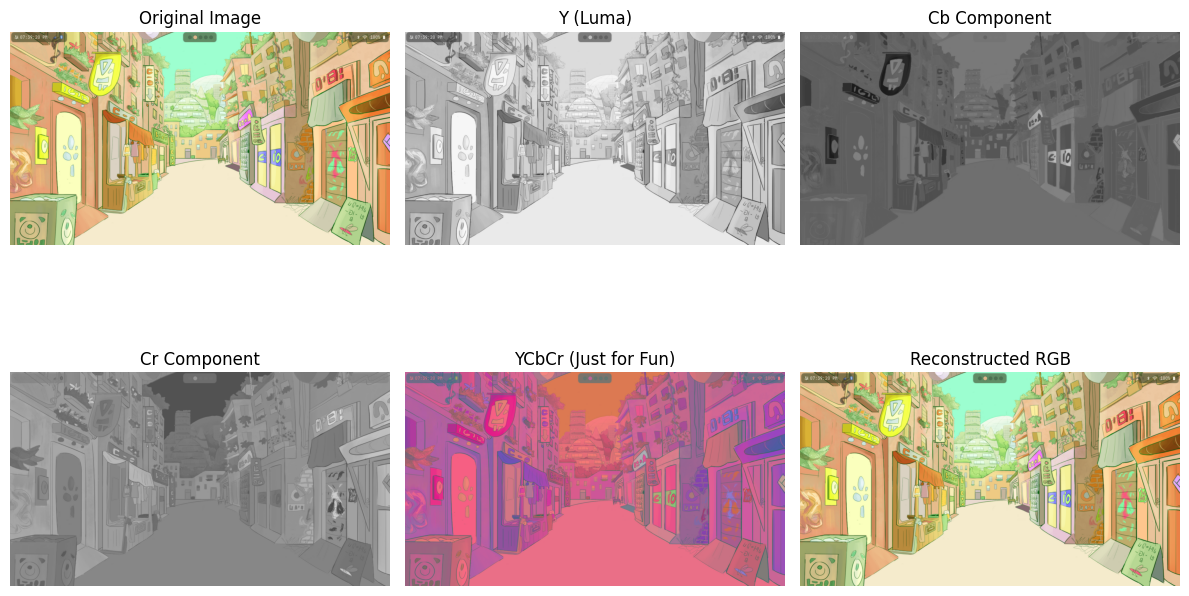

In [10]:
"""
Author: Amin Kafri
Desc: YCbCr to RGB Program. YCbCr is not used to render the image but it is stored
internally in some format. Therefore, I am going to render Y, Cb and Cr as separate value
as greyscale and explain the image. But the main implementation here is this function
ycbcr_to_rgb()
"""

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- RGB to YCbCr using matrix representation (no offset because we're using image as
# an example. Typically you want to offset when you're processing video and stuff) ---
def rgb_to_ycbcr(rgb):
    rgb_vector = np.array(rgb).reshape((3, 1))
    transform_matrix = np.array([
        [ 0.299,     0.587,     0.114    ],  # Y
        [-0.168736, -0.331264,  0.5      ],  # Cb
        [ 0.5,      -0.418688, -0.081312 ]   # Cr
    ])
    ycbcr_vector = np.dot(transform_matrix, rgb_vector)
    y  = ycbcr_vector[0, 0]
    cb = ycbcr_vector[1, 0]
    cr = ycbcr_vector[2, 0]
    return (y, cb, cr)

# --- Normalize Cb and Cr for display (shift to 0-255) ---
def normalize_cb_cr(val):
    return max(0, min(255, int(val + 128)))  # purely for visualization

# --- Display Y (luma) image as grayscale ---
def display_image_luma(ycbcr_list):
    img_array = np.array([
        [(int(y), int(y), int(y)) for (y, cb, cr) in row]
        for row in ycbcr_list
    ], dtype=np.uint8)
    return Image.fromarray(img_array)

# --- Display Cb or Cr component (visualize as grayscale) ---
def display_image_cbcr(ycbcr_list, index):
    img_array = np.array([
        [
            (normalize_cb_cr(pixel[index]),) * 3  # gray RGB triplet
            for pixel in row
        ]
        for row in ycbcr_list
    ], dtype=np.uint8)
    return Image.fromarray(img_array)

# --- Fun visualization: YCbCr shown as if it's RGB ---
def display_image_ycbcr(ycbcr_list):
    img_array = np.array([
        [
            (int(y), normalize_cb_cr(cb), normalize_cb_cr(cr))
            for (y, cb, cr) in row
        ]
        for row in ycbcr_list
    ], dtype=np.uint8)
    return Image.fromarray(img_array)

# --- Convert YCbCr back to RGB (no offset subtraction) ---
def ycbcr_to_rgb(ycbcr):
    y, cb, cr = ycbcr  # assume offset-free
    ycbcr_vector = np.array([y, cb, cr]).reshape((3, 1))
    inverse_matrix = np.array([
        [1.0,  0.0,       1.402    ],
        [1.0, -0.344136, -0.714136 ],
        [1.0,  1.772,     0.0      ]
    ])
    rgb_vector = np.dot(inverse_matrix, ycbcr_vector).flatten()
    rgb = tuple(max(0, min(255, int(v))) for v in rgb_vector)
    return rgb

# --- Convert full image RGB array to YCbCr list ---
def rgb_list_to_ycbcr_list(img_rgb):
    return [
        [rgb_to_ycbcr(tuple(pixel)) for pixel in row]
        for row in img_rgb
    ]

# --- Main ---
def main():
    img = Image.open('example1.png').convert("RGB")
    rgb_array = np.array(img)
    ycbcr_list = rgb_list_to_ycbcr_list(rgb_array)

    # Now we can use all the function we implement on the ycbr
    img_luma = display_image_luma(ycbcr_list)
    img_cb = display_image_cbcr(ycbcr_list, 1)
    img_cr = display_image_cbcr(ycbcr_list, 2)
    img_fun = display_image_ycbcr(ycbcr_list)

    # We're gonna reconstruct image from YCbCr to RGB. To compare the original
    # and the one we've got from converting the YCbCr back to RGB
    reconstructed = np.array([
        [ycbcr_to_rgb(pixel) for pixel in row]
        for row in ycbcr_list
    ], dtype=np.uint8)
    img_reconstructed = Image.fromarray(reconstructed)

    # Let's plot everythin.
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    titles = [
        'Original Image',
        'Y (Luma)',
        'Cb Component',
        'Cr Component',
        'YCbCr (Just for Fun)',
        'Reconstructed RGB'
    ]
    images = [
        img,
        img_luma,
        img_cb,
        img_cr,
        img_fun,
        img_reconstructed
    ]

    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

main()

"""
In Cb, the way you read the image is, the region where there is more blue in it, gonna be light
Where's darker pixel indicate less blue. Similarly in Cr, but for red color
You might be wondering, why is it when using YCbCr as RGB value (Row 2 Col 2 picture),
even though it's not the exact color we can still see the hint of the original
image. That's because of the Y that indicate Brightness or sharpness value. Our eyes
Can intepret Brightness better than colors that's why we can't tell it's the same image
"""

**apply color filters and effects to images**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving peaceful-sky-view.jpg to peaceful-sky-view.jpg


***Gray Scale***

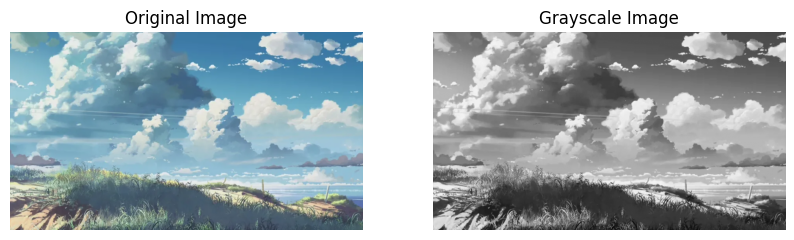

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Open image
img = Image.open('example1.jpg').convert('RGB')
img_np = np.array(img)

# Define the grayscale matrix
grayscale_matrix = np.array([0.299, 0.587, 0.114])

# Apply grayscale transformation
gray_img_np = np.dot(img_np[...,:3], grayscale_matrix)

# Convert to uint8 and PIL Image
gray_img = Image.fromarray(gray_img_np.astype('uint8'), 'L')
gray_img.save('output_grayscale.jpg')

# Display the original and processed grayscale images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Display grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

***Sepia***

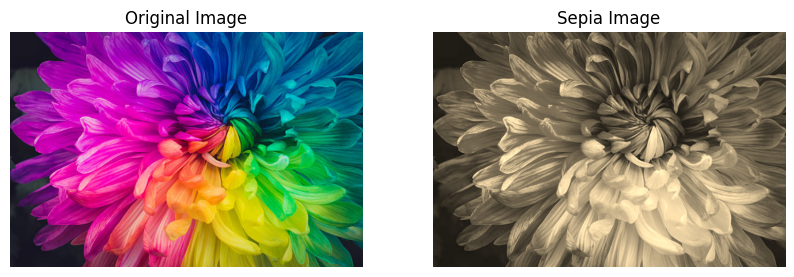

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def apply_sepia(input_image_path, output_image_path):
    img = Image.open(input_image_path).convert('RGB')
    width, height = img.size
    pixels = img.load()  # create the pixel map

    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))

            tr = int(0.393 * r + 0.769 * g + 0.189 * b)
            tg = int(0.349 * r + 0.686 * g + 0.168 * b)
            tb = int(0.272 * r + 0.534 * g + 0.131 * b)

            # Clamp values to [0, 255]
            tr = min(255, tr)
            tg = min(255, tg)
            tb = min(255, tb)

            pixels[px, py] = (tr, tg, tb)

    img.save(output_image_path)

    return Image.open(input_image_path), img  # Return both original and processed images

# Apply sepia and get both images
original_image, sepia_image = apply_sepia('example1.jpg', 'output_sepia.jpg')

# Display the original and sepia images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sepia_image)
plt.title('Sepia Image')
plt.axis('off')

plt.show()

***Negative (Invert)***

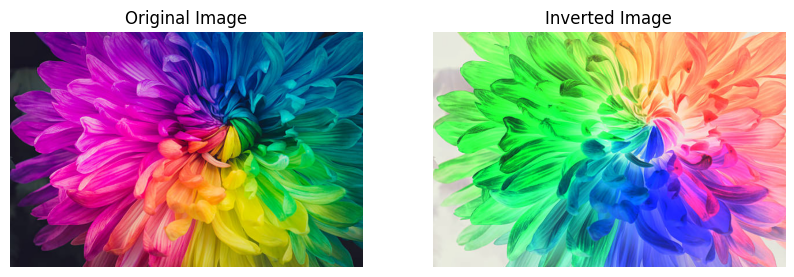

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display, Markdown

# Load and convert image to RGB
img = Image.open('example1.jpg').convert('RGB')
img_np = np.array(img)

# Apply negative transformation using matrix operation
negative_img_np = 255 - img_np

# Convert back to Image
negative_img = Image.fromarray(negative_img_np.astype('uint8'))

# Save
negative_img.save('output_negative.jpg')

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img)
plt.title('Inverted Image')
plt.axis('off')

plt.show()

***Contrast***

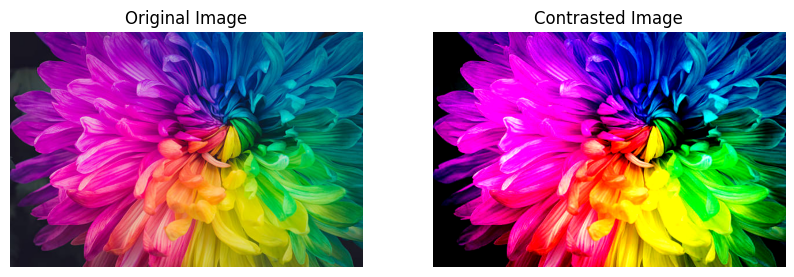

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display, Markdown

# Load and convert image to RGB
img = Image.open('example1.jpg').convert('RGB')
img_np = np.array(img).astype(np.float32)  # Convert to float for contrast operation

# Contrast adjustment factor
factor = 2.0  # Try values like 0.5 (lower contrast), 1.0 (original), 2.0 (high contrast)

# Apply contrast formula
contrast_img_np = factor * (img_np - 128) + 128
contrast_img_np = np.clip(contrast_img_np, 0, 255).astype('uint8')

# Convert to Image and show
contrast_img = Image.fromarray(contrast_img_np)
contrast_img.save('output_contrast.jpg')

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_img)
plt.title('Contrasted Image')
plt.axis('off')

plt.show()

***Posterization***

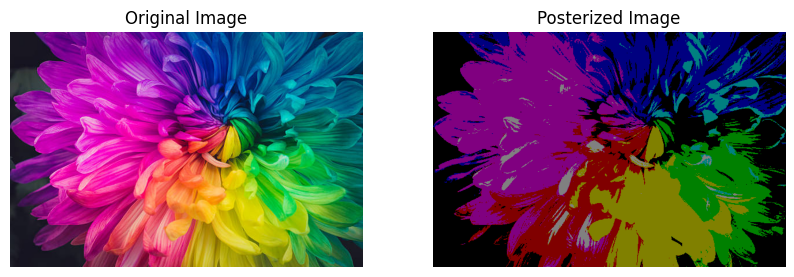

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_posterize(input_image_path, output_image_path, num_levels=2):
    img = Image.open(input_image_path).convert('RGB')
    img_np = np.array(img)

    # Step size for posterization (256 levels / num_levels)
    step_size = 256 // num_levels

    # Apply posterization: floor division followed by multiplication
    posterized_img_np = (img_np // step_size) * step_size

    # Convert back to Image and save
    posterized_img = Image.fromarray(posterized_img_np)
    posterized_img.save(output_image_path)

    return img, posterized_img  # Return original and posterized images for display

# Apply posterization and get the images
original_image, posterized_image = apply_posterize('example1.jpg', 'output_posterized.jpg')

# Display the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(posterized_image)
plt.title('Posterized Image')
plt.axis('off')

plt.show()

***Comparison***

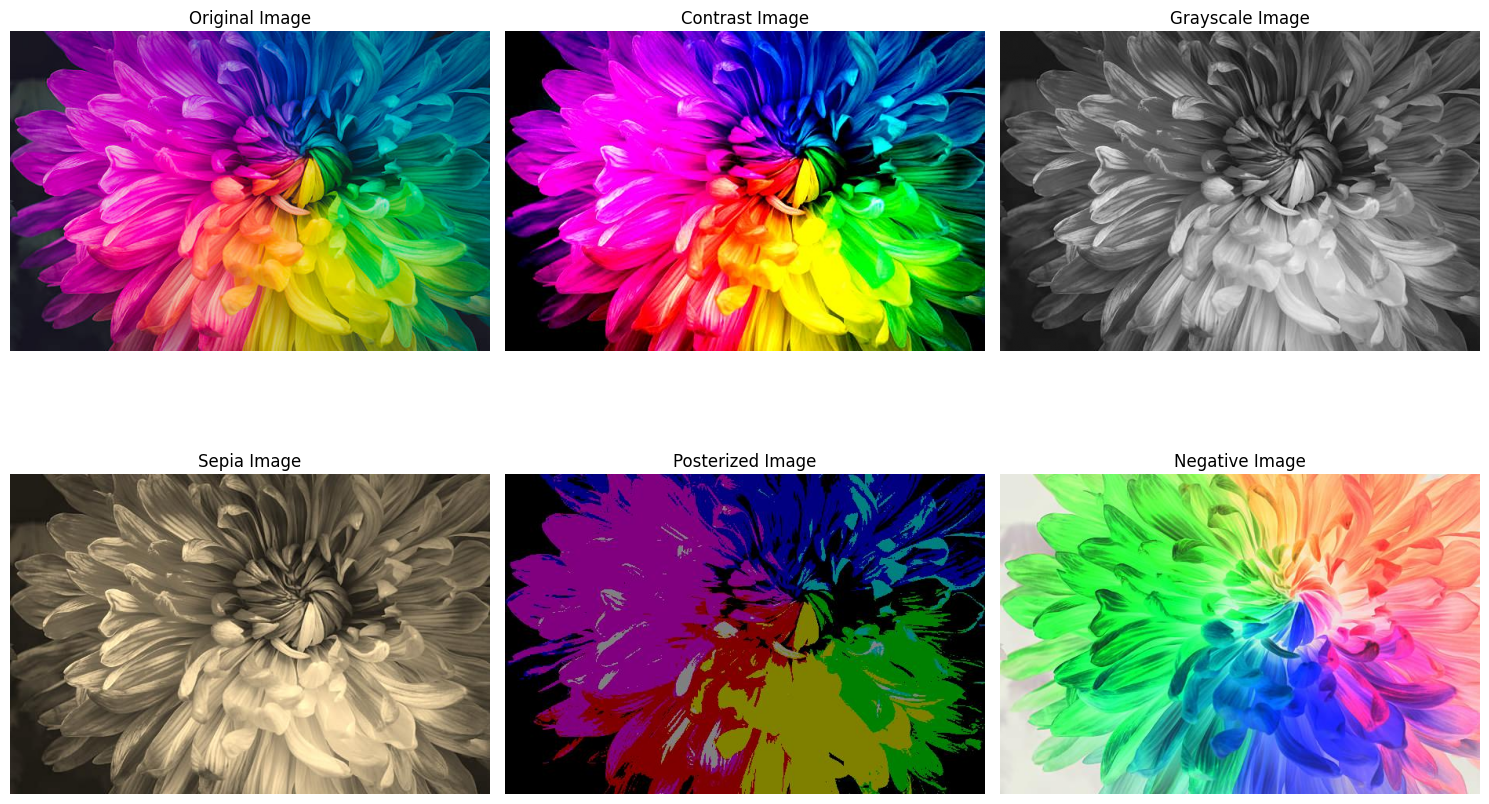

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load images
original_image = Image.open('example1.jpg')
contrast_image = Image.open('output_contrast.jpg')
grayscale_image = Image.open('output_grayscale.jpg')
sepia_image = Image.open('output_sepia.jpg')
posterized_image = Image.open('output_posterized.jpg')
negative_image = Image.open('output_negative.jpg')

# Display the images side by side for comparison
plt.figure(figsize=(15, 10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Display contrast image
plt.subplot(2, 3, 2)
plt.imshow(contrast_image)
plt.title('Contrast Image')
plt.axis('off')

# Display grayscale image
plt.subplot(2, 3, 3)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display sepia image
plt.subplot(2, 3, 4)
plt.imshow(sepia_image)
plt.title('Sepia Image')
plt.axis('off')

# Display posterized image
plt.subplot(2, 3, 5)
plt.imshow(posterized_image)
plt.title('Posterized Image')
plt.axis('off')

# Display negative image
plt.subplot(2, 3, 6)
plt.imshow(negative_image)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()